In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's start by reading in one year's worth a data to get a better feel

In [2]:
#df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], index_col = 'Date-Fuel')

In [32]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2009.xls', sheet_name = None)

In [33]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

In [34]:
cdf = pd.concat(df,sort=False)

In [35]:
cdf

Date-Fuel          Total     00:15:00     00:30:00  \
Dec 0       12/01/09-Coal  344662.606700  3527.836812  3525.455579   
    1     12/01/09-Gas_CC  242932.966800  1420.315751  1385.997810   
    2     12/01/09-Gas_GT   71808.619650   502.945262   457.913468   
    3      12/01/09-Hydro    1417.629183     3.758971     3.912429   
    4    12/01/09-Nuclear  123910.842100  1292.352781  1292.420399   
...                   ...            ...          ...          ...   
Jan 212   01/31/09-Gas_GT   46216.255679   431.803607   456.313176   
    213    01/31/09-Hydro     583.077892     4.617907     4.637324   
    214  01/31/09-Nuclear  122965.391051  1280.482927  1280.742829   
    215      01/31/09-Oth    9200.185998   100.291350   101.625572   
    216      01/31/09-Wnd   63706.543149   212.959066   222.279296   

            00:45:00     01:00:00     01:15:00     01:30:00     01:45:00  \
Dec 0    3539.974002  3546.573854  3531.061774  3534.054219  3520.630789   
    1    1354.780489  1343.984566  1287.036880  1236.250919  1243.458627   
    2     402.278370   381.436591   391.150652   387.187485   372.039791   
    3       3.904133     3.905441     3.874441     3.916154     3.935564   
    4    1292.050692  1291.291185  1290.856907  1291.073954  1291.246623   
...              ...          ...          ...          ...          ...   
Jan 212   451.424286   458.349728   445.087362   439.962761   433.320109   
    213     4.659604     4.647880     4.632703     4.647281     5.503680   
    214  1280.514679  1280.531728  1280.585721  1280.559350  1280.547328   
    215   101.815293   102.078418   101.618506   101.413295   100.967709   
    216   227.212640   237.140334   258.015743   276.829002   285.538316   

            02:00:00  ...     23:15:00     23:30:00     23:45:00  \
Dec 0    3519.040771  ...  3606.252975  3607.891878  3575.247415   
    1    1225.149697  ...  2250.922375  2199.815903  2169.871396   
    2     361.238387  ...   617.479794   546.580623   515.399398   
    3       3.925096  ...     8.504596     3.580446     3.350185   
    4    1290.960455  ...  1290.712616  1290.436600  1290.393291   
...              ...  ...          ...          ...          ...   
Jan 212   436.861861  ...   364.773270   353.623183   352.628839   
    213     5.553257  ...     4.331234     4.323538     4.360536   
    214  1280.797947  ...  1280.331346  1280.334539  1280.312947   
    215   100.819315  ...    81.993618    81.931461    81.787808   
    216   284.505419  ...   979.485817   979.015329   978.438893   

         1900-01-01 00:00:00  01:15:00.1  01:30:00.1  01:45:00.1  02:00:00.1  \
Dec 0            3566.807499         NaN         NaN         NaN         NaN   
    1            2117.746720         NaN         NaN         NaN         NaN   
    2             459.584081         NaN         NaN         NaN         NaN   
    3               3.305181         NaN         NaN         NaN         NaN   
    4            1290.050515         NaN         NaN         NaN         NaN   
...                      ...         ...         ...         ...         ...   
Jan 212           335.055871         NaN         NaN         NaN         NaN   
    213             4.363569         NaN         NaN         NaN         NaN   
    214          1280.537155         NaN         NaN         NaN         NaN   
    215            82.097624         NaN         NaN         NaN         NaN   
    216           981.570291         NaN         NaN         NaN         NaN   

         08:15:00.1  15:45:00.1  
Dec 0           NaN         NaN  
    1           NaN         NaN  
    2           NaN         NaN  
    3           NaN         NaN  
    4           NaN         NaN  
...             ...         ...  
Jan 212         NaN         NaN  
    213         NaN         NaN  
    214         NaN         NaN  
    215         NaN         NaN  
    216         NaN         NaN  

[2555 rows x 104 columns]

In [36]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)

cdf[['Date', 'Fuel']] = cdf.fuel.str.split("-", expand=True)

In [37]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [38]:
full_df

Date     Fuel          Total
Dec 0    12/01/09     Coal  344662.606700
    1    12/01/09   Gas_CC  242932.966800
    2    12/01/09   Gas_GT   71808.619650
    3    12/01/09    Hydro    1417.629183
    4    12/01/09  Nuclear  123910.842100
...           ...      ...            ...
Jan 212  01/31/09   Gas_GT   46216.255679
    213  01/31/09    Hydro     583.077892
    214  01/31/09  Nuclear  122965.391051
    215  01/31/09      Oth    9200.185998
    216  01/31/09      Wnd   63706.543149

[2555 rows x 3 columns]

In [15]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

In [20]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2009-01-01', periods=len(full_df), freq='D')

In [21]:
full_df

Fuel,Coal,Gas_CC,Gas_GT,Hydro,Nuclear,Oth,Wnd,date
date,,,,,,,,
2015-01-01,344662.606700,242932.966800,71808.619650,1417.629183,123910.842100,12391.413220,10566.192010,2009-01-01
2015-01-02,346227.743100,253163.912600,56636.495140,1407.917252,123770.389900,9423.257939,55018.423900,2009-01-02
2015-01-03,339243.885600,285220.111900,74156.945510,1624.800169,123582.854100,11188.869360,42425.895130,2009-01-03
2015-01-04,323357.808000,348111.376500,107318.846700,1513.226400,123779.775800,15463.789480,32531.355990,2009-01-04
2015-01-05,333110.101000,277321.230600,77316.955780,1225.651974,123984.075000,13931.584040,97504.455050,2009-01-05
...,...,...,...,...,...,...,...,...
2015-12-27,326771.523868,313633.246359,94484.393501,1027.948038,122826.784428,13747.177007,4457.904394,2009-12-27
2015-12-28,333156.282955,326332.362389,100506.559947,972.147681,123027.871134,17456.159530,13102.440151,2009-12-28
2015-12-29,328810.420124,297685.948822,85203.510611,979.759064,122895.829956,14027.572375,24828.509651,2009-12-29


In [22]:
full_df = full_df.set_index('date')


In [23]:
full_df

Fuel,Coal,Gas_CC,Gas_GT,Hydro,Nuclear,Oth,Wnd
date,,,,,,,
2009-01-01,344662.606700,242932.966800,71808.619650,1417.629183,123910.842100,12391.413220,10566.192010
2009-01-02,346227.743100,253163.912600,56636.495140,1407.917252,123770.389900,9423.257939,55018.423900
2009-01-03,339243.885600,285220.111900,74156.945510,1624.800169,123582.854100,11188.869360,42425.895130
2009-01-04,323357.808000,348111.376500,107318.846700,1513.226400,123779.775800,15463.789480,32531.355990
2009-01-05,333110.101000,277321.230600,77316.955780,1225.651974,123984.075000,13931.584040,97504.455050
...,...,...,...,...,...,...,...
2009-12-27,326771.523868,313633.246359,94484.393501,1027.948038,122826.784428,13747.177007,4457.904394
2009-12-28,333156.282955,326332.362389,100506.559947,972.147681,123027.871134,17456.159530,13102.440151
2009-12-29,328810.420124,297685.948822,85203.510611,979.759064,122895.829956,14027.572375,24828.509651


### We need to rename 'Wnd' to 'Wind' and 'Oth' to 'Other'

In [24]:
full_df.rename(columns  = {'Wnd':'Wind', 'Oth':'Other'}, inplace = True)

### Let's combine 'Gas_CC' & 'Gas-GT' as one column - 'NGas' for natural gas

In [25]:
full_df['NGas'] = full_df['Gas_CC'] + full_df['Gas_GT']
full_df.drop(columns = ['Gas_CC', 'Gas_GT'], inplace = True)

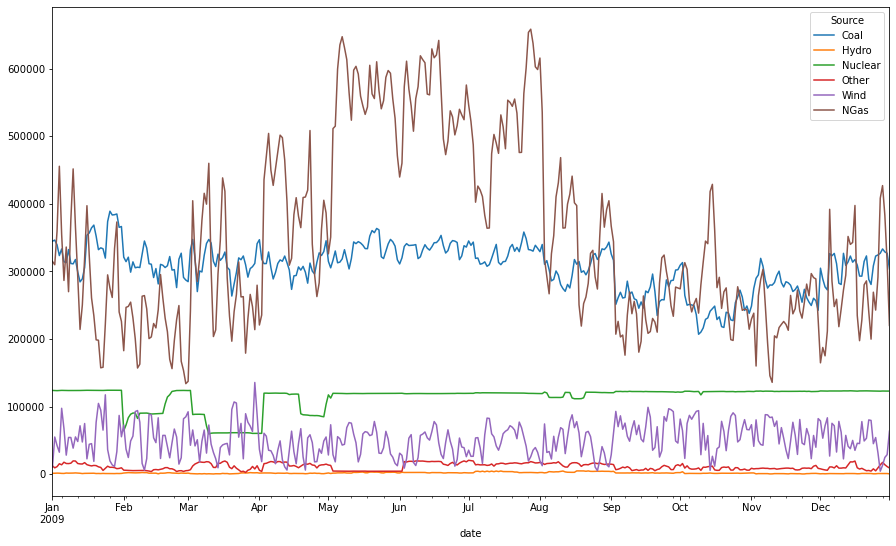

In [28]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


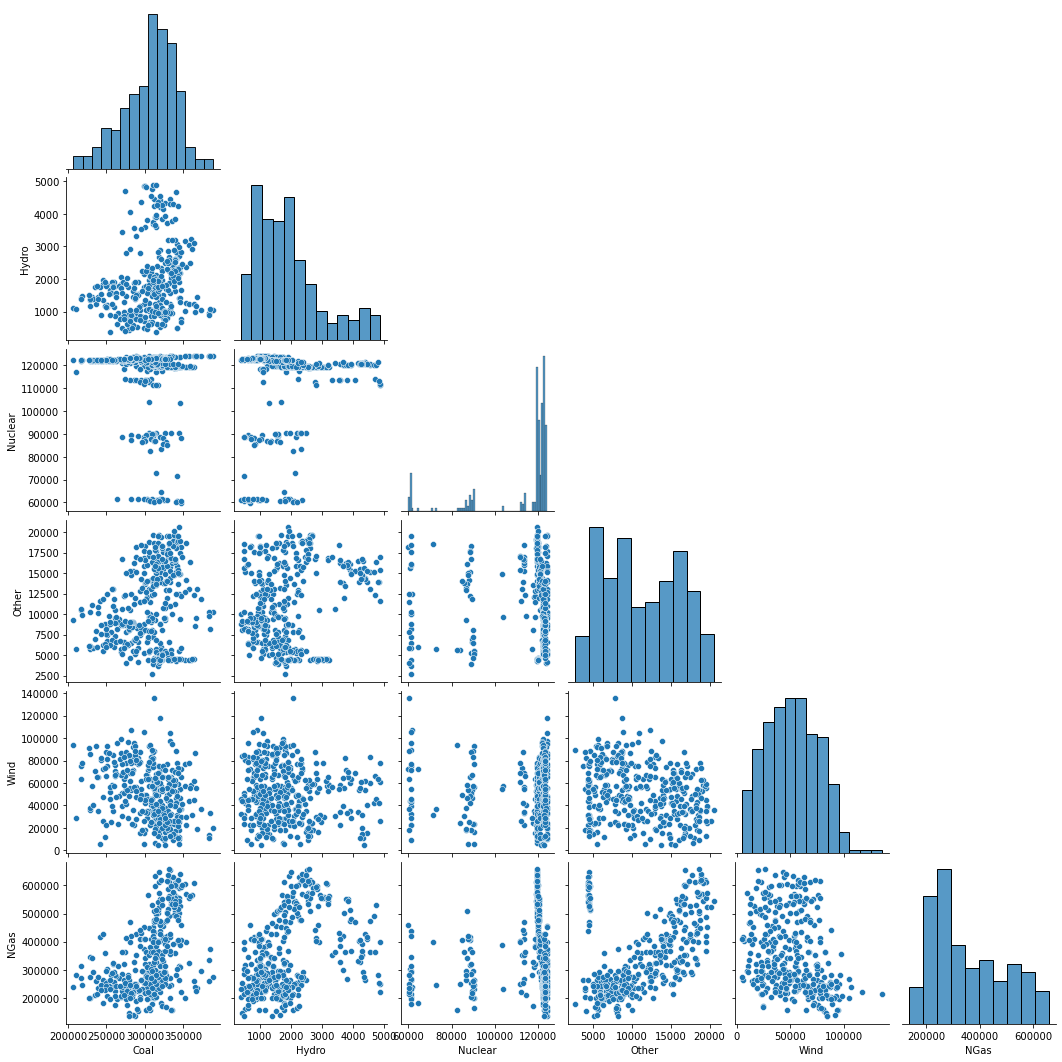

In [29]:
sns.pairplot(full_df, corner=True)

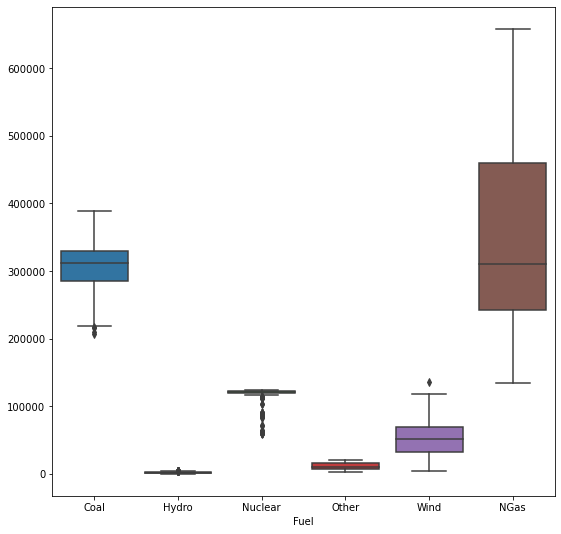

In [30]:
plt.figure(figsize=(9,9))
sns.boxplot(data = full_df,
            
            );


### Export the cleaned data

In [31]:
full_df.to_csv('../data/final_dfs/2009_clean.csv')